In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [6]:
# function converts txt file to csv file (longer porecessing time)
def txt_to_frm(txt_name):
	with open(txt_name +'.txt') as f:
		lines = f.readlines()

	output = pd.DataFrame()
	for riadok in lines[4:]:
		hodnota = riadok.split('\t')
		row_dict = {
			'time': float(hodnota[0]),
			'temp': float(hodnota[1]),
			#'F': float(hodnota[2]),
			#'Fz': float(hodnota[3]),
			#'Mx': float(hodnota[4]),
			#'My': float(hodnota[5]),
			#'Mz': float(hodnota[6]),
		}
		df_dictionary = pd.DataFrame([row_dict])
		output = pd.concat([output, df_dictionary], ignore_index=True)
    
	output.to_csv(txt_name +'.csv')
	#print(output.head())

In [8]:
txt_to_frm('tool_temp')
hodnoty = pd.read_csv('tool_temp.csv').set_index('time') #set time as index
hodnoty

,Unnamed: 0,temp
time,,
1.632580e-07,0,20.000047
3.265160e-07,1,20.000188
4.897740e-07,2,20.000453
6.530320e-07,3,20.000870
8.162900e-07,4,20.001468
...,...,...
1.626050e-04,995,1409.553605
1.627682e-04,996,1409.984768
1.629315e-04,997,1410.716873


In [4]:

#hodnoty.drop(hodnoty.columns[[0,1]], axis=1, inplace=True)  #remove frst column
loadx=hodnoty

In [5]:
loadx.rename(columns = {'F':'x_load'}, inplace = True)

In [ ]:
result = pd.concat([loadx, loady, loadr], axis=1)

In [ ]:
result.to_csv('DEFORM_loads.csv')

In [11]:
result.info

# Vykreslovanie dat so suboru 'DEFORM_loads.csv' co je sumar zatazenia s deformácie

In [3]:
hodnoty = pd.read_csv('DEFORM_loads.csv').set_index('time') #set time as index
hodnoty

,x_load,y_load,r_load
time,,,
0.000004,1.746029,56.206326,3.038201
0.000007,13.845973,57.884044,8.770585
0.000011,3.321932,80.007799,10.453674
0.000015,14.288017,72.373589,7.581743
0.000019,3.866539,76.013511,3.322660
...,...,...,...
0.000964,6.742221,32.787559,15.765770
0.000966,7.374187,23.580216,9.424989
0.000970,3.043977,35.882665,20.700464


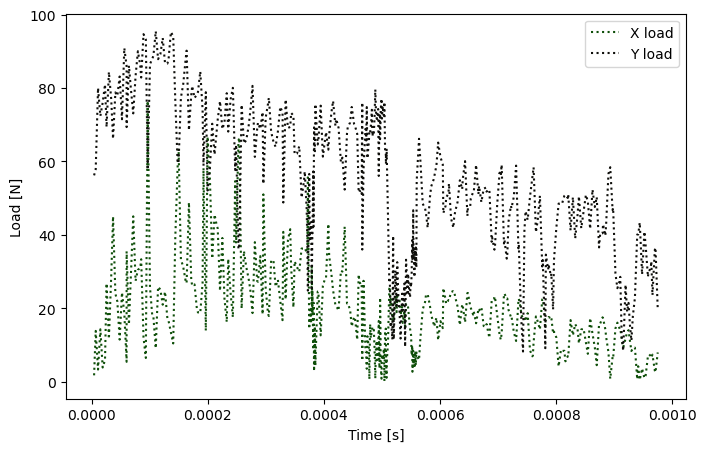

In [51]:
def plot_graph(dataset):

    fig=plt.figure(figsize=(8,5))
    plt.style.use('default')
    
    plt.plot(dataset[['x_load']], linestyle = ':', color=('#0f4f0a'))
    plt.plot(dataset[['y_load']], linestyle = ':', color=('#0f0f0b'))
    #plt.title(' Line plot')
    plt.xlabel('Time [s]')
    plt.ylabel('Load [N]')
    plt.legend(['X load','Y load','X ESW','Y ESW'])

    #plt.show()
    plt.savefig('my_plot.png')
    
plot_graph(dataset=hodnoty[['x_load','y_load']])

In [4]:
ss = hodnoty.ewm(com=20).mean() # Provide exponentially weighted (EW) calculations.

In [5]:
## fit curve to data
red_x = ss.iloc[[0,30,80,100,350,379], 0] #zredukované x na každý dany bod
red_y = ss.iloc[[0,50,100,200,265,365], 1] #zredukované x na každý dany bod

xx = red_x.index.to_numpy()
xy = red_x.to_numpy()
X_Spline = make_interp_spline(xx,xy)
# Returns evenly spaced numbers
# over a specified interval.
X_X = np.linspace(xx.min(), xx.max(), 500)
X_Y = X_Spline(X_X)

yx = red_y.index.to_numpy()
yy = red_y.to_numpy()
Y_Spline = make_interp_spline(yx,yy)
Y_X = np.linspace(yx.min(), yx.max(), 500)
Y_Y = Y_Spline(Y_X)

In [70]:
xy

array([ 1.7460295 , 17.75949699,  8.33520219])

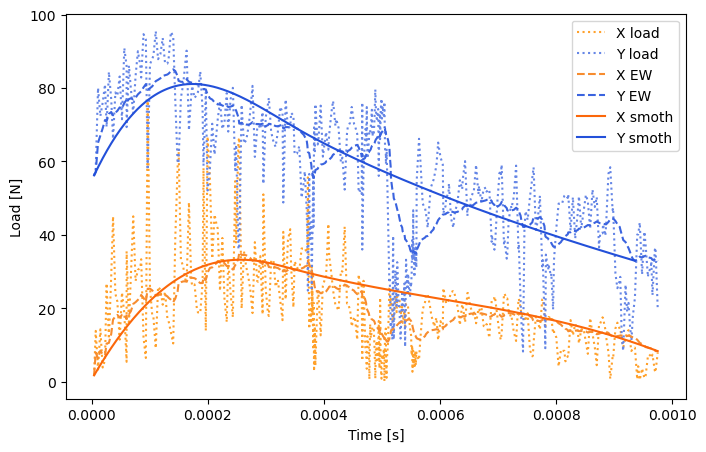

In [8]:
fig=plt.figure(figsize=(8,5))
plt.style.use('default')
plt.plot(hodnoty[['x_load']], linestyle = ':', color=('#ffa12b'))
plt.plot(hodnoty[['y_load']], linestyle = ':', color=('#6586e6'))
plt.plot(ss[['x_load']], linestyle = '--', color=('#f78c2f'))
plt.plot(ss[['y_load']], linestyle = '--', color=('#3a63df'))
plt.plot(X_X, X_Y, color=('#fb670a'))
plt.plot(Y_X, Y_Y, color=('#2350d9'))
#plt.plot(yx, yy)
plt.xlabel('Time [s]')
plt.ylabel('Load [N]')
plt.legend(['X load','Y load','X EW','Y EW', 'X smoth', 'Y smoth'])
plt.show
plt.savefig('sumarry_loads.png')

# Zobrazenie dát v jednom grafe

In [35]:
jzub = pd.read_csv('meranie_jeden_zub.csv').set_index('time') #set time as index

In [36]:
nove_jzub= jzub.index.to_frame(name='newtime').join(jzub)
nove_jzub['newtime'] = nove_jzub['newtime']-14.00918

In [42]:
#nove_jzub = nove_jzub.set_index('newtime')
#nove_jzub.drop(index=-0.00006, inplace = True)
#jzub=nove_jzub.iloc[1:]
jzub

,Fx,Fy,Fz
newtime,,,
0.00000,0.915527,9.33838,17.334000
0.00006,19.775400,13.54980,9.155270
0.00012,60.363800,29.35790,-7.324220
0.00018,119.446000,41.87010,-42.480500
0.00024,190.491000,47.72950,-56.396500
...,...,...,...
0.00240,19.104000,17.88330,0.366211
0.00246,-1.403810,10.37600,6.469730
0.00252,-6.042480,8.48389,8.422850


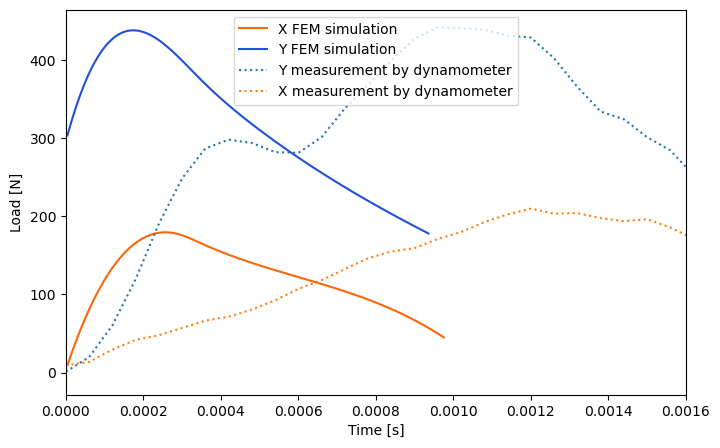

In [58]:
fig=plt.figure(figsize=(8,5))
plt.style.use('default')
#plt.plot(hodnoty[['x_load']], linestyle = ':', color=('#ffa12b'))
#plt.plot(hodnoty[['y_load']], linestyle = ':', color=('#6586e6'))
#plt.plot(ss[['x_load']], linestyle = '--', color=('#f78c2f'))
#plt.plot(ss[['y_load']], linestyle = '--', color=('#3a63df'))
plt.plot(X_X, X_Y*5.4, color=('#fb670a'))
plt.plot(Y_X, Y_Y*5.4, color=('#2350d9'))
#plt.plot(yx, yy)
plt.xlabel('Time [s]')
plt.ylabel('Load [N]')
plt.plot(jzub['Fx'], linestyle = ':')
plt.plot(jzub['Fy'], linestyle = ':')
plt.legend(['X FEM simulation','Y FEM simulation','Y measurement by dynamometer','X measurement by dynamometer'])
plt.xlim([0,0.0016])
plt.show
plt.savefig('compare_loads.png')

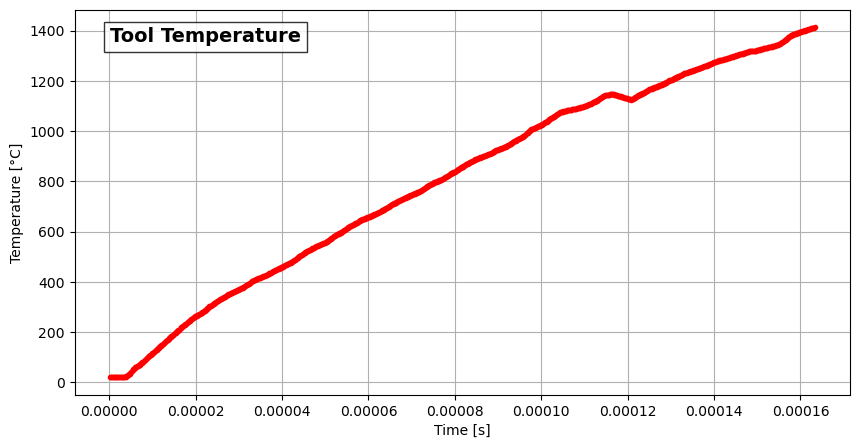

In [32]:
# vykreslenie grafu teploty
hodnoty = pd.read_csv('tool_temp.csv')
hodnoty.drop(hodnoty.columns[0], axis=1, inplace=True)
hodnoty.set_index(hodnoty.columns[0], inplace=True)

# Assuming df is already processed as per your requirements
x = hodnoty.index  # The index as x-axis
y = hodnoty.iloc[:, 0]  # The first column as y-axis

# Plot the graph
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='.', linestyle='-', color='r', label=hodnoty.columns[0])

# Formatting
plt.xlabel("Time [s]")
plt.ylabel("Temperature [°C]")
plt.grid(True)

# Add title **inside the plot** at the top-left
plt.text(
    hodnoty.index[0],  # X position (first x-value)
    max(y),  # Y position (maximum y-value)
    "Tool Temperature",  # Title text
    fontsize=14,
    fontweight="bold",
    verticalalignment="top",  # Align text at the top
    bbox=dict(facecolor="white", alpha=0.8)  # Background box for better visibility
)

# Show the plot
plt.savefig('Tool_Temperature.png')
plt.show()

In [33]:
# List of text files to process
file_names = ["x.txt", "y.txt", "z.txt"]

# Empty dictionary to store data
dataframes = []

# Read each file
for i, file in enumerate(file_names):
    df = pd.read_csv(file, sep="\t", skiprows=3, header=None, names=["Index", f"Value_{i+1}"])
    df.set_index("Index", inplace=True)  # Set the first column as index
    dataframes.append(df)

# Merge all files based on the index
final_df = pd.concat(dataframes, axis=1)

# Save to CSV
final_df.to_csv("merged_data.csv")

# Show result
print(final_df.head())  # Display first few rows

                Value_1    Value_2    Value_3
Index                                        
0.000000e+00   0.000000   0.000000   0.000000
1.728610e-07   9.845927  25.337474  13.730689
3.457220e-07  18.160960  56.574504  26.106370
5.185830e-07  21.350243  64.909117  32.313051
6.914440e-07  22.890972  69.076932  34.706578


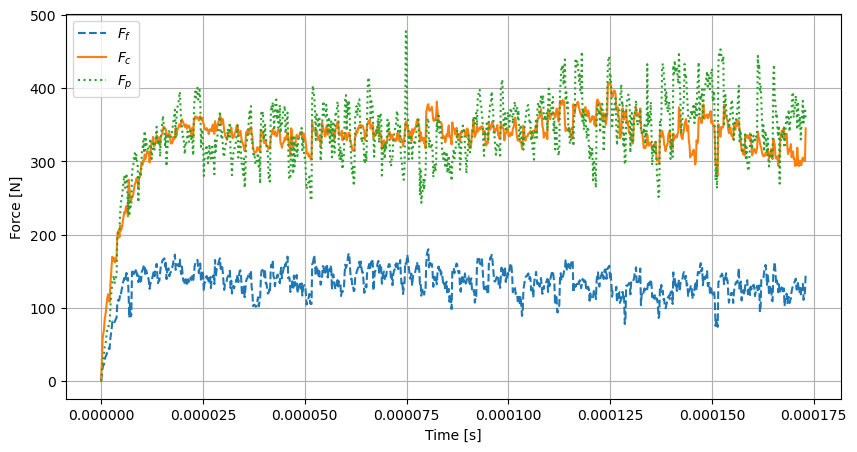

In [55]:
# Plot the data
plt.figure(figsize=(10, 5))
linestyles = ["--", "-", ":"] 

for i, column in enumerate(final_df.columns):
    plt.plot(final_df.index, final_df[column], linestyle=linestyles[i % len(linestyles)], label=column)

# Formatting
plt.xlabel("Time [s]")
plt.ylabel("Force [N]")

plt.legend(['$F_f$','$F_c$','$F_p$'])
plt.grid(True)

# Show the plot
plt.savefig('Cutting forcess.png')
plt.show()

In [57]:
# Read the TXT file, skipping the first line and using the second line as headers
df = pd.read_csv("vypocty_pre_zadavanie_do_deformu.txt", sep="\t", skiprows=1, index_col=0)

# Show the DataFrame
print(df)

        ff     fc     fp   fc.1  ff.1   x=ff   y=fc   z=fp
Vc                                                        
800   89,5  168,6  173,6  197.7  83.3  135,2  334,3  332,9
900   87,4  171,1  171,1  194.6  79.2  132,3    308  307,2
1000  56,6  177,4  169,8  192.0  75.7  133,3  316,4  323,4
1100  92,1  196,3  176,6  189.7  72.7  144,9  343,4  376,6
1200  84,9  193,8  165,2  187.7  70.1  142,2  373,7  368,6
1300  79,5  187,5    158  185.9  67.8  141,7  330,8  338,7
1400  89,5  176,6  157,2  184.3  65.8  138,2  330,2  335,9
1500    87  174,9  154,3  182.9  63.9  140,3  329,4  332,3
1600  78,6  173,2  137,5  181.6  62.3  141,7  338,3  326,4
1700  62,4  173,2  126,5  180.4  60.8  145,5  335,9  333,3
1800  51,7  156,8  106,8  179.3  59.4  145,3  347,2  342,1


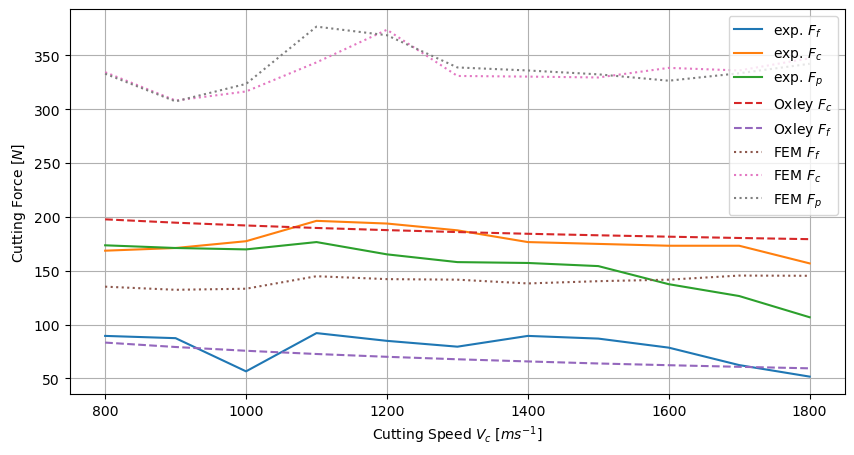

In [82]:
# Replace commas with dots and convert all values to float
df = df.replace(',', '.', regex=True).astype(float)

# Create the plot
plt.figure(figsize=(10, 5))

linestyles = ["-","-","-","--","--",":",":",":"] 
label = ["exp. $F_f$","exp. $F_c$","exp. $F_p$","Oxley $F_c$","Oxley $F_f$","FEM $F_f$","FEM $F_c$","FEM $F_p$"]

# Loop through all columns and plot each one
for i, column in enumerate (df.columns):
    plt.plot(df.index, df[column], linestyle=linestyles[i % len(linestyles)], label=label[i % len(label)])

# Add the legend at the top-right
plt.legend(loc="upper right")

# Formatting
plt.xlabel("Cutting Speed $V_c$ [$ms^{-1}$]")
plt.ylabel("Cutting Force [$N$]")
plt.grid(True)

plt.savefig('forcess_vs_speed.png')
# Show the plot
plt.show()

In [84]:
# Read the TXT file, skipping the first line and using the second line as headers
df = pd.read_csv("temperature.txt", sep="\t", skiprows=0, index_col=0)

# Show the DataFrame
print(df)

      nastroj   workpiece 
Vc                        
800        831         571
900        844         450
1000      1110         749
1100       873         540
1200       917         581
1300       993         643
1400      1070         507
1500      1040         362
1600      1080         382
1700      1130         373
1800      1040         365


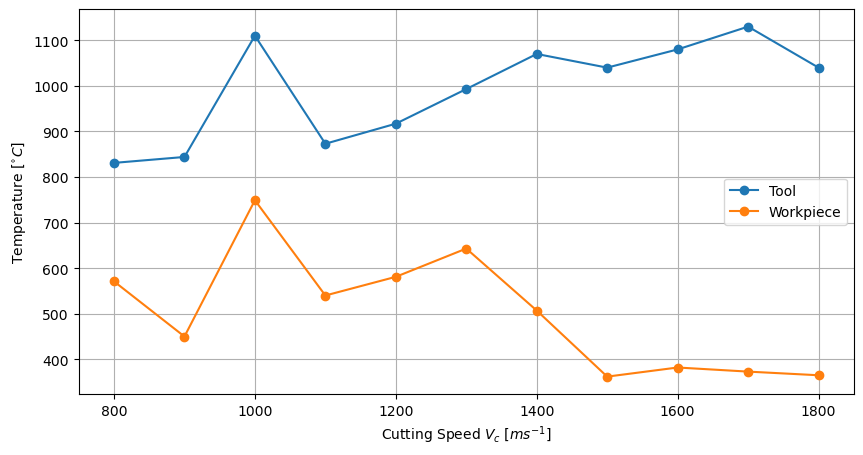

In [91]:
# Replace commas with dots and convert all values to float
df = df.replace(',', '.', regex=True).astype(float)

# Create the plot
plt.figure(figsize=(10, 5))

linestyles = ["-","-","-","--","--",":",":",":"] 
label = ["Tool","Workpiece"]

# Loop through all columns and plot each one
for i, column in enumerate (df.columns):
    plt.plot(df.index, df[column],marker='o', linestyle=linestyles[i % len(linestyles)], label=label[i % len(label)])

# Add the legend at the top-right
plt.legend(loc="right")

# Formatting
plt.xlabel("Cutting Speed $V_c$ [$ms^{-1}$]")
plt.ylabel("Temperature [$^{\circ}C$]")
plt.grid(True)

plt.savefig('forcess_vs_temp.png')
# Show the plot
plt.show()